# Aula-Exercício Semi-Submersível

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensões da Plataforma (Dados de Entrada)
Lp = 30 # meio comprimento do pontoon
H = 20  # calado
Dc = 10 # diâmetro da coluna
Dp = 10 # diâmetro do pontoon
GM = 1.56 # Altura metcêntrica longitudinal e transversal
rho = 1025 # densidade da água
g = 9.81 #aceleração da gravidade
Rg = 0.5*Lp # Raio de giro para cálculo da inércia própria da plataforma
alfa = 90.0001*np.pi/180 # direção de onda
zetah = 0.02 # amortecimento heave
zetar = 0.05 # amortecimento roll
zetap = 0.05 # amortecimento pitch
CM = 1 # coeficiente de massa adicional da seção circular


## Colunas
Sc = np.pi*((Dc/2)**2) # área seccional de cada coluna
AWF = 4*Sc   # área de linha d'água
Vc  = 4*Sc*H # Volume deslocado total das coluna

## Pontoons
Sp = np.pi*((Dp/2)**2) # área seccional de cada pontoon
Vp  = 4*Sp*(2*Lp) # Volume deslocado total dos pontoon

## Valores Totais
VT  = Vp + Vc
Massa_plat = rho*VT
I_plat = Massa_plat*(Rg**2)

# Massas e Inércias adicionais e os períodos naturais não amortecidos

In [ ]:
Mah = CM*rho*Vp # massa adicional de heave
wnh = np.sqrt(rho*g*AWF/(Massa_plat+Mah))
Iaa = rho*CM*Vp*2/3*(Lp**2) # inércia adicional de roll ou pitch
wna = np.sqrt(Massa_plat*g*GM/(I_plat+Iaa))

print('wn_heave = {:.2f} rad/s'.format(wnh))
print('Tn_heave = {:.2f} s'.format(2*np.pi/wnh))
print('wn_roll,pitch = {:.2f} rad/s'.format(wna))
print('Tn_roll,pitch = {:.2f} s'.format(2*np.pi/wna))

wn_heave = 0.26 rad/s
Tn_heave = 23.74 s
wn_roll,pitch = 0.15 rad/s
Tn_roll,pitch = 41.73 s


# Vetor de frequencia para o calculo do RAO



In [ ]:
# Definição do intervalo de freqüências de onda e número de onda (águas profundas)
w = np.linspace(2*np.pi/600, 2*np.pi/4, 1000);
k = (w**2)/g # relação de dispersão

# Grau de Liberdade: Heave

In [ ]:
A_onda = 1 # amplitude unitária para adimensionalização

# Força nos pontoons / m de onda
F = -(1+CM)*rho*Vp*(w**2)*A_onda*np.exp(-k*(H-Dp/2))
Q1 = 0.5*(np.sin(k*Lp*np.cos(alfa))*np.cos(k*Lp*np.sin(alfa)) / (k*Lp*np.cos(alfa)) + np.sin(k*Lp*np.sin(alfa))*np.cos(k*Lp*np.cos(alfa)) / (k*Lp*np.sin(alfa)))

# Força nas colunas
Fc = rho*g*AWF*A_onda*np.exp(-k*H)
G1 = np.cos(k*(Lp+Dc/2)*np.sin(alfa))*np.cos(k*(Lp+Dc/2)*np.cos(alfa))

# Força total
Fres_heave = Fc*G1 + F*Q1

# RAO
Betah = w/wnh

H_heave = np.abs(Fres_heave)/(rho*g*AWF*np.sqrt((1-(Betah**2))**2+((2*zetah*Betah)**2)))

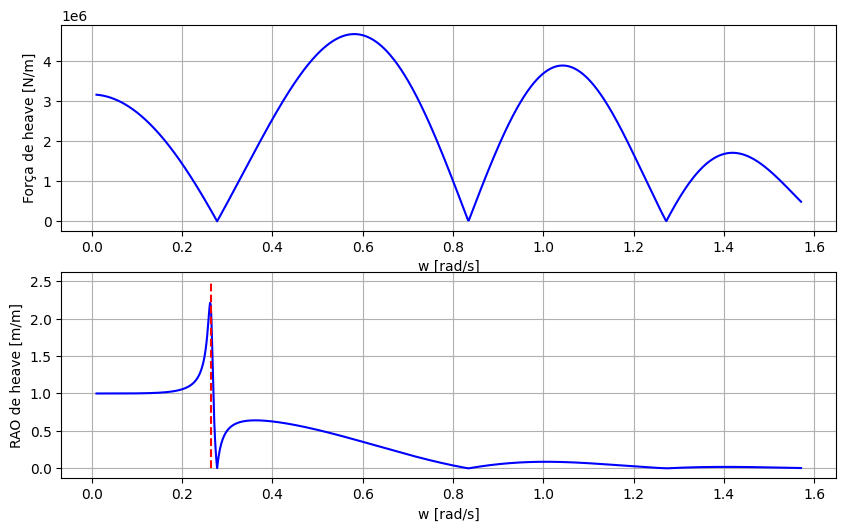

In [ ]:
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(w,np.abs(Fres_heave),'b')
plt.xlabel('w [rad/s]')
plt.ylabel('Força de heave [N/m]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(w,H_heave,'b')
plt.xlabel('w [rad/s]')
plt.ylabel('RAO de heave [m/m]')
plt.grid()
plt.plot([wnh, wnh], [0, 2.5], 'r--')
plt.show()

# Grau de Liberdade: Roll

In [ ]:
delta=0
Betaa=w/wna;

Q2=1/2*(np.sin(k*Lp*np.sin(alfa-delta))*np.sin(k*Lp*np.cos(alfa-delta))/(k*Lp*np.cos(alfa-delta))-np.cos(k*Lp*np.cos(alfa-delta))/(k*Lp*np.sin(alfa-delta))*(np.cos(k*Lp*np.sin(alfa-delta))-np.sin(k*Lp*np.sin(alfa-delta))/(k*Lp*np.sin(alfa-delta))))
G2=np.sin(k*(Lp+Dc/2)*np.sin(alfa-delta))*np.cos(k*(Lp+Dc/2)*np.cos(alfa-delta))

# Momento de Roll
Nres_roll=Fc*Lp*G2+F*Lp*Q2

#RAO de roll
H_roll=np.abs(Nres_roll)/(Massa_plat*g*GM*np.sqrt((1-(Betaa**2))**2+((2*zetar*Betaa)**2)))

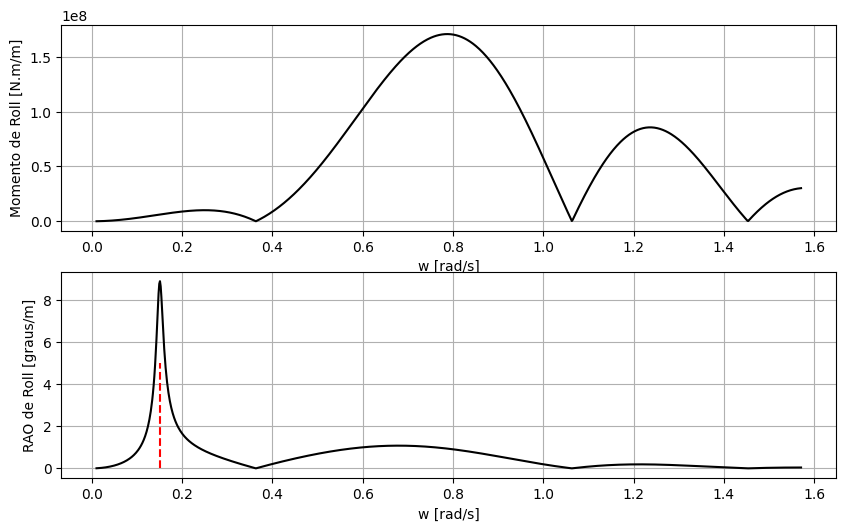

In [ ]:
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(w,np.abs(Nres_roll),'k')
plt.xlabel('w [rad/s]')
plt.ylabel('Momento de Roll [N.m/m]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(w,H_roll*180/np.pi,'k')
plt.xlabel('w [rad/s]')
plt.ylabel('RAO de Roll [graus/m]')
plt.grid()
plt.plot([wna, wna], [0, 5], 'r--')
plt.show()

# Grau de liberdade: Pitch

In [ ]:
delta=np.pi/2

Q2=1/2*(np.sin(k*Lp*np.sin(alfa-delta))*np.sin(k*Lp*np.cos(alfa-delta))/(k*Lp*np.cos(alfa-delta))-np.cos(k*Lp*np.cos(alfa-delta))/(k*Lp*np.sin(alfa-delta))*(np.cos(k*Lp*np.sin(alfa-delta))-np.sin(k*Lp*np.sin(alfa-delta))/(k*Lp*np.sin(alfa-delta))))
G2=np.sin(k*(Lp+Dc/2)*np.sin(alfa-delta))*np.cos(k*(Lp+Dc/2)*np.cos(alfa-delta))

# Momento de Onda de Pitch
Nres_pitch=Fc*Lp*G2+F*Lp*Q2

# RAO de Pitch
H_pitch=np.abs(Nres_pitch)/(Massa_plat*g*GM*np.sqrt((1-(Betaa**2))**2+((2*zetap*Betaa)**2)))

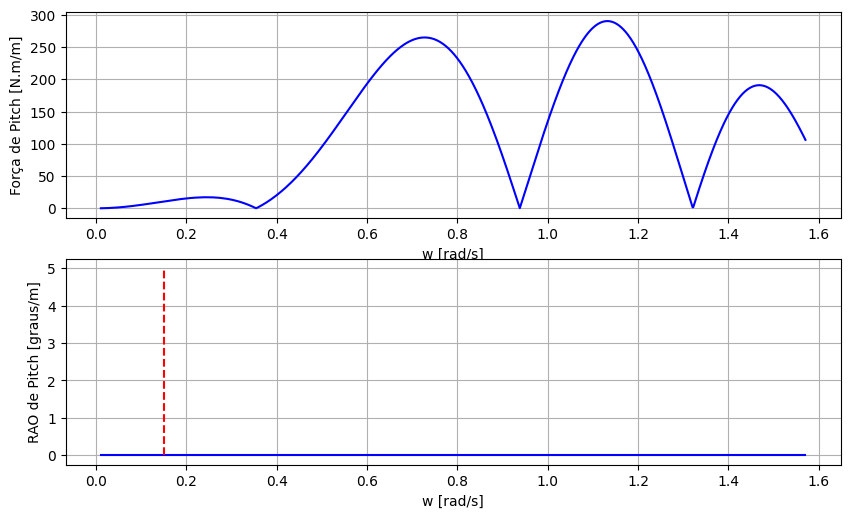

In [ ]:
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(w,np.abs(Nres_pitch),'b')
plt.xlabel('w [rad/s]')
plt.ylabel('Força de Pitch [N.m/m]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(w,H_pitch*180/np.pi,'b')
plt.xlabel('w [rad/s]')
plt.ylabel('RAO de Pitch [graus/m]')
plt.grid()
plt.plot([wna, wna], [0, 5], 'r--')
plt.show()

# Plots em função do período

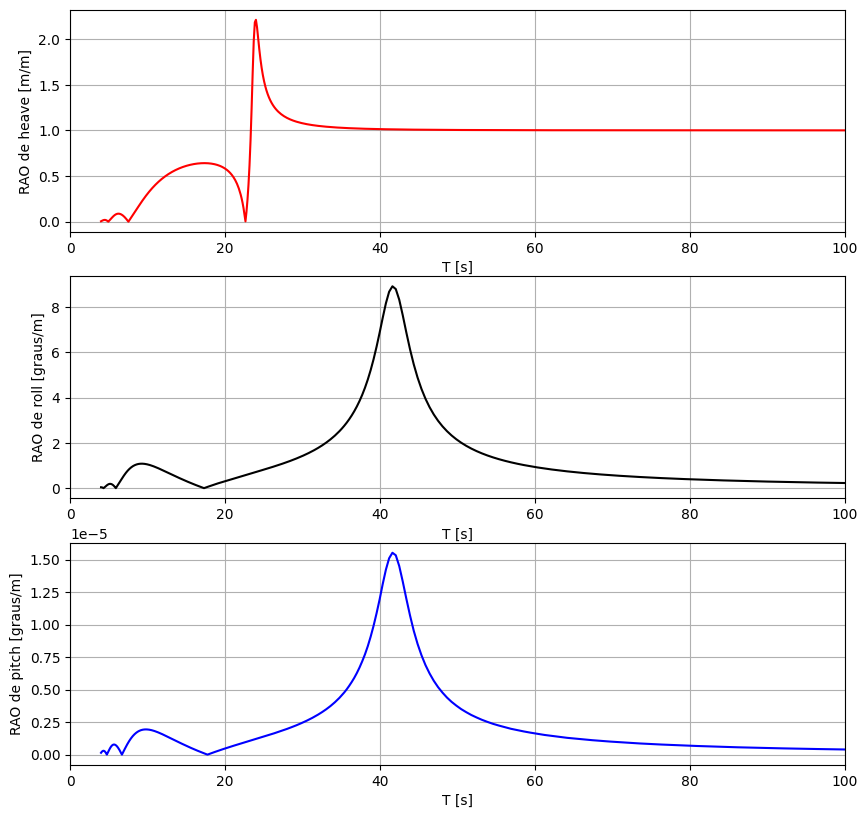

In [ ]:
plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(3,1,1)
plt.plot(2*np.pi/w,H_heave,'r')
plt.xlabel('T [s]')
plt.ylabel('RAO de heave [m/m]')
plt.xlim((0,100))
plt.grid()
plt.subplot(3,1,2)
plt.plot(2*np.pi/w,H_roll*180/np.pi,'k')
plt.xlabel('T [s]')
plt.ylabel('RAO de roll [graus/m]')
plt.xlim((0,100))
plt.grid()
plt.subplot(3,1,3)
plt.plot(2*np.pi/w,H_pitch*180/np.pi,'b')
plt.xlabel('T [s]')
plt.ylabel('RAO de pitch [graus/m]')
plt.grid()
plt.xlim((0,100))
plt.show()

# Apêndices
## Cálculo do limite assintótico


$\dfrac{\sin(k L_p \sin(\alpha)) \cos(k L_p \cos(\alpha))}{k L_p \sin(\alpha)}$

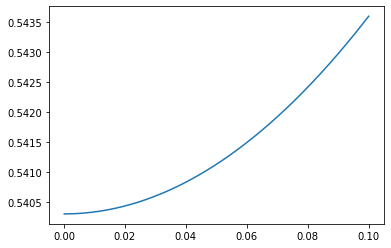

[0.5403023058681398, 0.5403023091749908]

In [ ]:
x = np.linspace(0.0001, .1, 1000)

yy = np.sin(np.sin(x))*np.cos(np.cos(x)) / np.sin(x)
plt.plot(x, yy)
plt.show()

[np.cos(np.cos(0)), yy[0]] 